<a href="https://colab.research.google.com/github/RubenCarty/Razonamiento-y-Planificaci-n-Automatica_UNIR/blob/main/Ac1_B%C3%BAsqueda_rutas_empresa_paqueteria_Ruben_Quispe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

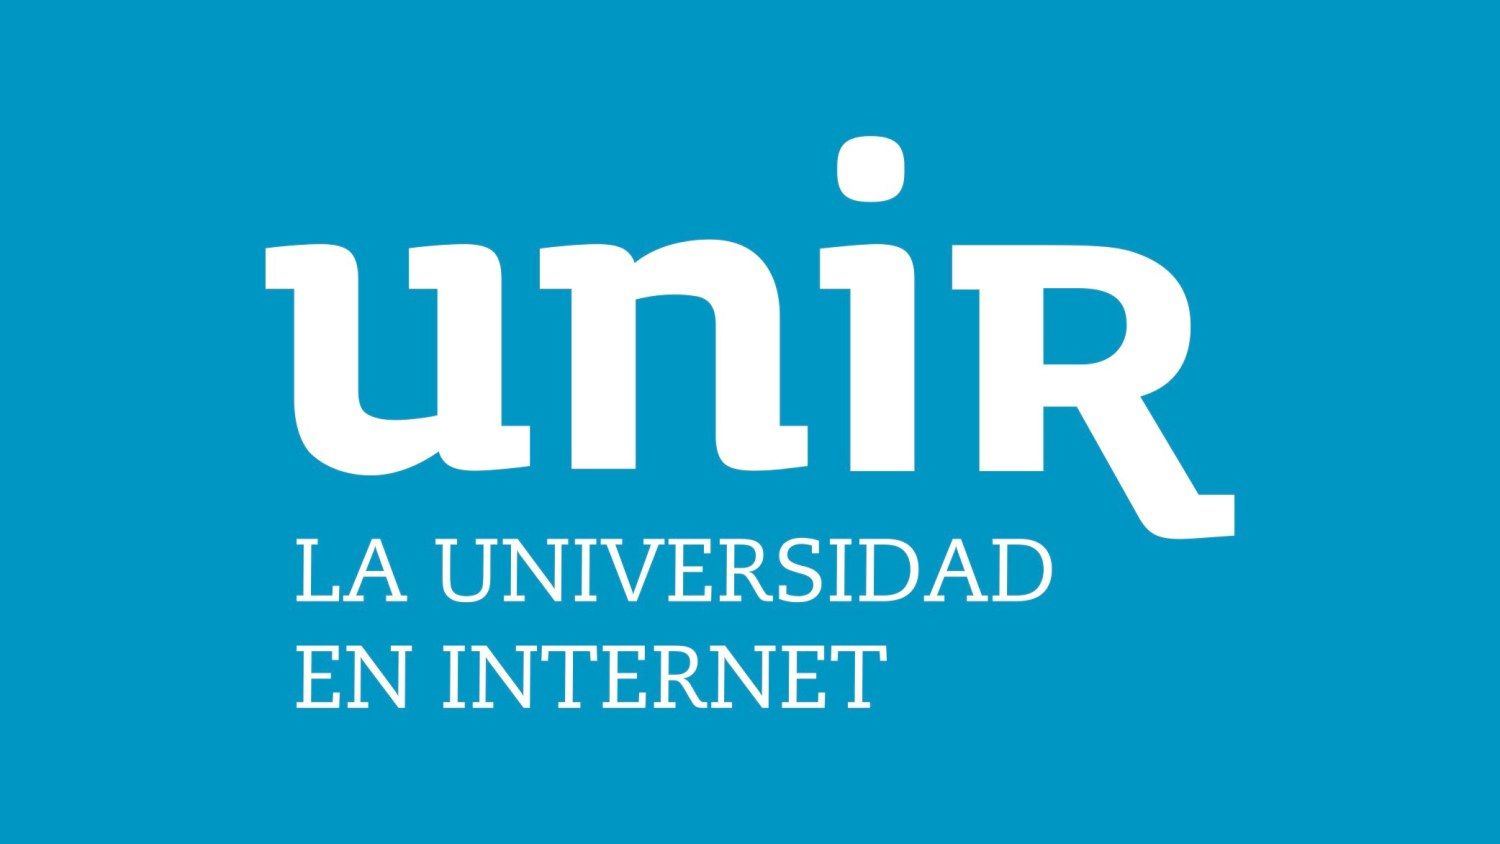

<center>

# **Actividad1 :  Resolución de problema mediante búsqueda heurística**

   # **Curso: Razonamiento y Planificación Automática**

# **Máster Universitario en Inteligencia Artificial**
# [Student: RUBEN QUISPE](https://www.linkedin.com/in/ruben-quispe-l/)

</center>





## Importante

El código siguiente es el que debe usarse para la ejecución de la actividad.
En caso de requerir modificaciones se subirán ficheros de sustitución al aula de la asignatura


In [1]:
!pip install simpleai flask pydot graphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.4/94.4 kB 880.7 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for simpleai: filename=simpleai-0.8.3-py3-none-any.whl size=100985 sha256=1730ffb4b2b0faa996de27546ca0ea2e704dd920b34e559dc3474fb3d8cc233e
  Stored in directory: /root/.cache/pip/wheels/91/0c/38/421d7910e7bc59b97fc54f490808bdb1097607d83d1a592865
Successfully built simpleai


In [2]:
#!/usr/bin/env python
# coding: utf-8

# 2024 Modified by: Alejandro Cervantes
# Remember installing pyplot and flask if you want to use WebViewer

# NOTA: WebViewer sólo funcionará si ejecutáis en modo local

from __future__ import print_function

import math
from simpleai.search.viewers import BaseViewer,ConsoleViewer,WebViewer
from simpleai.search import SearchProblem, astar, breadth_first, depth_first, uniform_cost



class GameWalkPuzzle(SearchProblem):

    def __init__(self, board, costs, heuristic_number):
        self.board = board
        self.goal = (0, 0)
        self.costs = costs
        self.heuristic_number = heuristic_number
        for y in range(len(self.board)):
            for x in range(len(self.board[y])):
                if self.board[y][x].lower() == "t":
                    self.initial = (x, y)
                elif self.board[y][x].lower() == "p":
                    self.goal = (x, y)

        super(GameWalkPuzzle, self).__init__(initial_state=self.initial)

    def actions(self, state):
        actions = []
        for action in list(self.costs.keys()):
            newx, newy = self.result(state, action)
            if self.board[newy][newx] != "#":
                actions.append(action)
        return actions

    def result(self, state, action):
        x, y = state

        if action.count("up"):
            y -= 1
        if action.count("down"):
            y += 1
        if action.count("left"):
            x -= 1
        if action.count("right"):
            x += 1

        new_state = (x, y)
        return new_state

    def is_goal(self, state):
        return state == self.goal

    def cost(self, state, action, state2):
        return self.costs[action]

    # Esta función heurística es la distancia entre el estado actual
    # el objetivo (único) identificado como self.goal
    def heuristic1(self, state):
        x, y = state
        gx, gy = self.goal
        return abs(x - gx) + abs(y - gy)

    def heuristic2(self, state):
        x, y = state
        gx, gy = self.goal
        return max(abs(x - gx),abs(y - gy))

    def heuristic3(self, state):
        x, y = state
        gx, gy = self.goal
        return 2*(abs(x - gx) + abs(y - gy))

    def heuristic(self,state):
      if self.heuristic_number == 1:
          return self.heuristic1(state)
      elif self.heuristic_number == 2:
          return self.heuristic2(state)
      elif self.heuristic_number == 3:
          return self.heuristic3(state)
      else:
        raise Exception("El número de la función heurística debe estar entre 1 y 3. Revise la inicialización del problema.")

def searchInfo (problem,result,use_viewer):
    def getTotalCost (problem,result):
        originState = problem.initial_state
        totalCost = 0
        for action,endingState in result.path():
            if action is not None:
                totalCost += problem.cost(originState,action,endingState)
                originState = endingState
        return totalCost


    res = "Total length of solution: {0}\n".format(len(result.path()))
    res += "Total cost of solution: {0}\n".format(getTotalCost(problem,result))

    if use_viewer:
        stats = [{'name': stat.replace('_', ' '), 'value': value}
                         for stat, value in list(use_viewer.stats.items())]

        for s in stats:
            res+= '{0}: {1}\n'.format(s['name'],s['value'])
    return res


def resultado_experimento(problem,MAP,result,used_viewer):
    path = [x[1] for x in result.path()]

    for y in range(len(MAP)):
        for x in range(len(MAP[y])):
            if (x, y) == problem.initial:
                print("T", end='')
            elif (x, y) == problem.goal:
                print("P", end='')
            elif (x, y) in path:
                print("·", end='')
            else:
                print(MAP[y][x], end='')
        print()

    info=searchInfo(problem,result,used_viewer)
    print(info)

def main(MAP_ASCII,COSTS,algorithms,heuristic_number=1):
    MAP = [list(x) for x in MAP_ASCII.split("\n") if x]

    for algorithm in algorithms:
      problem = GameWalkPuzzle(MAP,COSTS,heuristic_number)
      used_viewer=BaseViewer()
      # Probad también ConsoleViewer para depurar
      # No podréis usar WebViewer en Collab para ver los árboles

      # Mostramos tres experimentos
      print ("Experimento con algoritmo {}:".format(algorithm))

      result = algorithm(problem, graph_search=True,viewer=used_viewer)
      resultado_experimento(problem,MAP,result,used_viewer)





In [3]:
#!/usr/bin/env python
# coding: utf-8

# 2024 Modified by: Alejandro Cervantes
# Configuración y llamada para el caso 1
# Se ejecutan los algoritmos de búsqueda en amplitud y búsqueda en profundidad

MAP_ASCII = """
########
#    P #
# #### #
#  T # #
# ##   #
#      #
########
"""

COSTS = {
    "up": 1.0,
    "down": 1.0,
    "right": 1.0,
    "left": 1.0,
}

algorithms=(breadth_first,depth_first)
main (MAP_ASCII,COSTS,algorithms)

Experimento con algoritmo <function breadth_first at 0x78f4b2a093f0>:
########
#    P·#
# ####·#
#  T·#·#
# ##···#
#      #
########
Total length of solution: 9
Total cost of solution: 8.0
max fringe size: 5
visited nodes: 23
iterations: 23

Experimento con algoritmo <function depth_first at 0x78f4b2a0a830>:
########
#    P·#
# ####·#
#··T #·#
#·##  ·#
#······#
########
Total length of solution: 15
Total cost of solution: 14.0
max fringe size: 5
visited nodes: 15
iterations: 15



In [6]:
#!/usr/bin/env python
# coding: utf-8

# 2024 Modified by: Alejandro Cervantes
# Configuración y llamada para el caso 2
# Se utiliza el mismo mapa pero se varían los costes

MAP_ASCII = """
########
#    P #
# #### #
#  T # #
# ##   #
#      #
########
"""

COSTS = {
    "up": 5.0,
    "down": 5.0,
    "right": 2.0,
    "left": 2.0,
}

algorithms=(breadth_first,uniform_cost,astar)
main (MAP_ASCII,COSTS,algorithms)

Experimento con algoritmo <function breadth_first at 0x78f4b2a093f0>:
########
#    P·#
# ####·#
#  T·#·#
# ##···#
#      #
########
Total length of solution: 9
Total cost of solution: 28.0
max fringe size: 5
visited nodes: 23
iterations: 23

Experimento con algoritmo <function uniform_cost at 0x78f4b2a0a9e0>:
########
#····P #
#·#### #
#··T # #
# ##   #
#      #
########
Total length of solution: 9
Total cost of solution: 22.0
max fringe size: 6
visited nodes: 22
iterations: 22

Experimento con algoritmo <function astar at 0x78f4b2a0ab00>:
########
#····P #
#·#### #
#··T # #
# ##   #
#      #
########
Total length of solution: 9
Total cost of solution: 22.0
max fringe size: 6
visited nodes: 20
iterations: 20



In [8]:
#!/usr/bin/env python
# coding: utf-8

# 2024 Modified by: Alejandro Cervantes
# Configuración y llamada para el caso 3
# Se utiliza el mismo mapa y se usan diferentes heurísticas

MAP_ASCII = """
########
#    P #
# #### #
#  T # #
# ##   #
#      #
########
"""

COSTS = {
    "up": 1.0,
    "down": 1.0,
    "right": 1.0,
    "left": 1.0,
}

algorithms=(astar,)
main (MAP_ASCII,COSTS,algorithms,1)
main (MAP_ASCII,COSTS,algorithms,2)
main (MAP_ASCII,COSTS,algorithms,3)



Experimento con algoritmo <function astar at 0x78f4b2a0ab00>:
########
#    P·#
# ####·#
#  T·#·#
# ##···#
#      #
########
Total length of solution: 9
Total cost of solution: 8.0
max fringe size: 5
visited nodes: 16
iterations: 16

Experimento con algoritmo <function astar at 0x78f4b2a0ab00>:
########
#    P·#
# ####·#
#  T·#·#
# ##···#
#      #
########
Total length of solution: 9
Total cost of solution: 8.0
max fringe size: 6
visited nodes: 17
iterations: 17

Experimento con algoritmo <function astar at 0x78f4b2a0ab00>:
########
#    P·#
# ####·#
#  T·#·#
# ##···#
#      #
########
Total length of solution: 9
Total cost of solution: 8.0
max fringe size: 4
visited nodes: 11
iterations: 11



# **Diseñando mapas para analizar los resultados**

In [12]:
#!/usr/bin/env python
# coding: utf-8
# 2024 Modified by: Ruben Quispe
# Configuración y llamada para el caso 2
# Se ha modificado el mapa, y se han asignado costes de manera aleatoria entre 1 y 10:
import random

#MAP_ASCII = """
#########
##    P #
## #### #
##  T # #
## ##   #
##      #
#########
#"""


#MAP_ASCII = """
############
##         #
##         #
##  ##   # #
## ##### # #
##  #    # #
##  #P ##  #
##   ##    #
##   T     #
############
#"""

MAP_ASCII = """
###########
#         #
#   # # # #
# ##### # #
#  #    # #
#  #P ##  #
#  ####   #
#   T     #
###########
"""

# Generar números aleatorios entre 1 y 10 para cada dirección:
random_up = random.randint(1, 10)
random_down = random.randint(1, 10)
random_right = random.randint(1, 10)
random_left = random.randint(1, 10)
print(f"up: {random_up}")
print(f"down: {random_down}")
print(f"right: {random_right}")
print(f"left: {random_left}")
# Actualizar el diccionario COSTS con los números aleatorios generados
COSTS = {
    "up": random_up,
    "down": random_down,
    "right": random_right,
    "left": random_left,
}
#algorithms=(breadth_first,uniform_cost,astar)
algorithms=(uniform_cost,astar)
main (MAP_ASCII,COSTS,algorithms)

#Verificando de esta manera que siempre se obtiene el mismo costo total para UCS y A*

up: 9
down: 3
right: 1
left: 4
Experimento con algoritmo <function uniform_cost at 0x78f4b2a0a9e0>:
###########
#      ···#
#   # #·#·#
# #####·#·#
#  # ···#·#
#  #P·## ·#
#  ####  ·#
#   T·····#
###########
Total length of solution: 21
Total cost of solution: 91
max fringe size: 5
visited nodes: 45
iterations: 45

Experimento con algoritmo <function astar at 0x78f4b2a0ab00>:
###########
#      ···#
#   # #·#·#
# #####·#·#
#  # ···#·#
#  #P·## ·#
#  ####  ·#
#   T·····#
###########
Total length of solution: 21
Total cost of solution: 91
max fringe size: 5
visited nodes: 45
iterations: 45



In [10]:
#!/usr/bin/env python
# coding: utf-8

# 2024 Modified by: Ruben Quispe
# Configuración y llamada para el caso 3
# Se utiliza el mapa modificada y se usan diferentes heurísticas
MAP_ASCII = """
###########
#         #
#   #   # #
#   #     #
# ##P  #  #
# ##      #
#  T      #
###########
"""

COSTS = {
    "up": 1.0,
    "down": 1.0,
    "right": 1.0,
    "left": 1.0,
}

algorithms=(astar,)
main (MAP_ASCII,COSTS,algorithms,1)
main (MAP_ASCII,COSTS,algorithms,2)
main (MAP_ASCII,COSTS,algorithms,3)



Experimento con algoritmo <function astar at 0x78f4b2a0ab00>:
###########
#         #
#   #   # #
#   #     #
# ##P  #  #
# ##·     #
#  T·     #
###########
Total length of solution: 4
Total cost of solution: 3.0
max fringe size: 4
visited nodes: 4
iterations: 4

Experimento con algoritmo <function astar at 0x78f4b2a0ab00>:
###########
#         #
#   #   # #
#   #     #
# ##P  #  #
# ##·     #
#  T·     #
###########
Total length of solution: 4
Total cost of solution: 3.0
max fringe size: 4
visited nodes: 5
iterations: 5

Experimento con algoritmo <function astar at 0x78f4b2a0ab00>:
###########
#         #
#   #   # #
#   #     #
# ##P  #  #
# ##·     #
#  T·     #
###########
Total length of solution: 4
Total cost of solution: 3.0
max fringe size: 4
visited nodes: 4
iterations: 4



In [14]:
#!/usr/bin/env python
# coding: utf-8
# 2024 Modified by: Ruben Quispe
# Configuración y llamada para el caso 3
# Se ha modificado el mapa y se usan diferentes heurísticas:

MAP_ASCII = """
###########
#         #
#         #
#  ##   # #
# ##### # #
#  #    # #
#  #P ##  #
#   ##    #
#   T     #
###########
"""
COSTS = {
    "up": 1.0,
    "down": 1.0,
    "right": 1.0,
    "left": 1.0,
}

algorithms=(astar,)
main (MAP_ASCII,COSTS,algorithms,1)
main (MAP_ASCII,COSTS,algorithms,2)
main (MAP_ASCII,COSTS,algorithms,3)

algorithms02=(uniform_cost,)
main (MAP_ASCII,COSTS,algorithms02)

#Es asi como se verifica que para el algoritmo A* con heuristica 3 tiene un incremento de costo total.

Experimento con algoritmo <function astar at 0x78f4b2a0ab00>:
###########
#         #
#      ···#
#  ##  ·#·#
# #####·#·#
#  # ···#·#
#  #P·##··#
#   ##··· #
#   T··   #
###########
Total length of solution: 21
Total cost of solution: 20.0
max fringe size: 7
visited nodes: 52
iterations: 52

Experimento con algoritmo <function astar at 0x78f4b2a0ab00>:
###########
#         #
#      ···#
#  ##  ·#·#
# #####·#·#
#  # ···#·#
#  #P·##··#
#   ##··· #
#   T··   #
###########
Total length of solution: 21
Total cost of solution: 20.0
max fringe size: 8
visited nodes: 56
iterations: 56

Experimento con algoritmo <function astar at 0x78f4b2a0ab00>:
###########
#         #
# ····    #
#··##···# #
#·#####·# #
#··# ···# #
# ·#P·##  #
# ··##    #
#  ·T     #
###########
Total length of solution: 23
Total cost of solution: 22.0
max fringe size: 8
visited nodes: 48
iterations: 48

Experimento con algoritmo <function uniform_cost at 0x78f4b2a0a9e0>:
###########
#         #
#      ···#
#  ##  ·#·#
# ##

# Conclusiones

1. **Comparación de algoritmos de búsqueda no informada**: Al probar y comparar los algoritmos de búsqueda en amplitud y en profundidad, observamos que la amplitud tiende a encontrar soluciones más cortas en términos de longitud total de la solución, pero puede requerir más nodos visitados y una mayor cantidad de iteraciones en comparación con la profundidad. Sin embargo, la eficiencia de un algoritmo puede depender del problema específico y de sus características, como la profundidad del árbol de búsqueda y la presencia de soluciones cercanas al inicio.
2. **Importancia de la optimización de costos:** En el caso de la comparación de algoritmos como Dijkstra y A* en un problema de búsqueda con costos, es fundamental considerar no solo la longitud total de la solución, sino también el costo total de la solución. Aunque ambos algoritmos pueden encontrar la solución óptima, A* utiliza una heurística que guía la búsqueda hacia la dirección más prometedora, lo que puede resultar en una menor cantidad de nodos visitados y, por lo tanto, en una búsqueda más eficiente.
3. **Influencia de las heurísticas en A*:** Al comparar diferentes funciones heurísticas en el algoritmo A*, observamos que la elección de la heurística puede afectar significativamente la eficiencia y la calidad de la solución. Algunas heurísticas pueden ser más apropiadas para ciertos tipos de problemas o pueden proporcionar estimaciones más precisas del costo restante para alcanzar la meta. Sin embargo, es importante recordar que la calidad de la solución no solo depende de la heurística, sino también de la naturaleza del problema y del diseño del mapa.

En resumen, esta actividad nos proporciona una comprensión más profunda de los algoritmos de búsqueda utilizados en la planificación de rutas en una empresa de paquetería. Nos ayuda a entender cómo diferentes algoritmos y heurísticas afectan la eficiencia y la calidad de la solución en diferentes escenarios, lo que es crucial para tomar decisiones informadas al abordar problemas reales de logística y planificación de rutas en la industria de la paquetería.